In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
customer_df = pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")

In [3]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.shape

(9134, 24)

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [6]:
customer_df.columns = customer_df.columns.str.lower().str.replace(' ', '_')
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [7]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

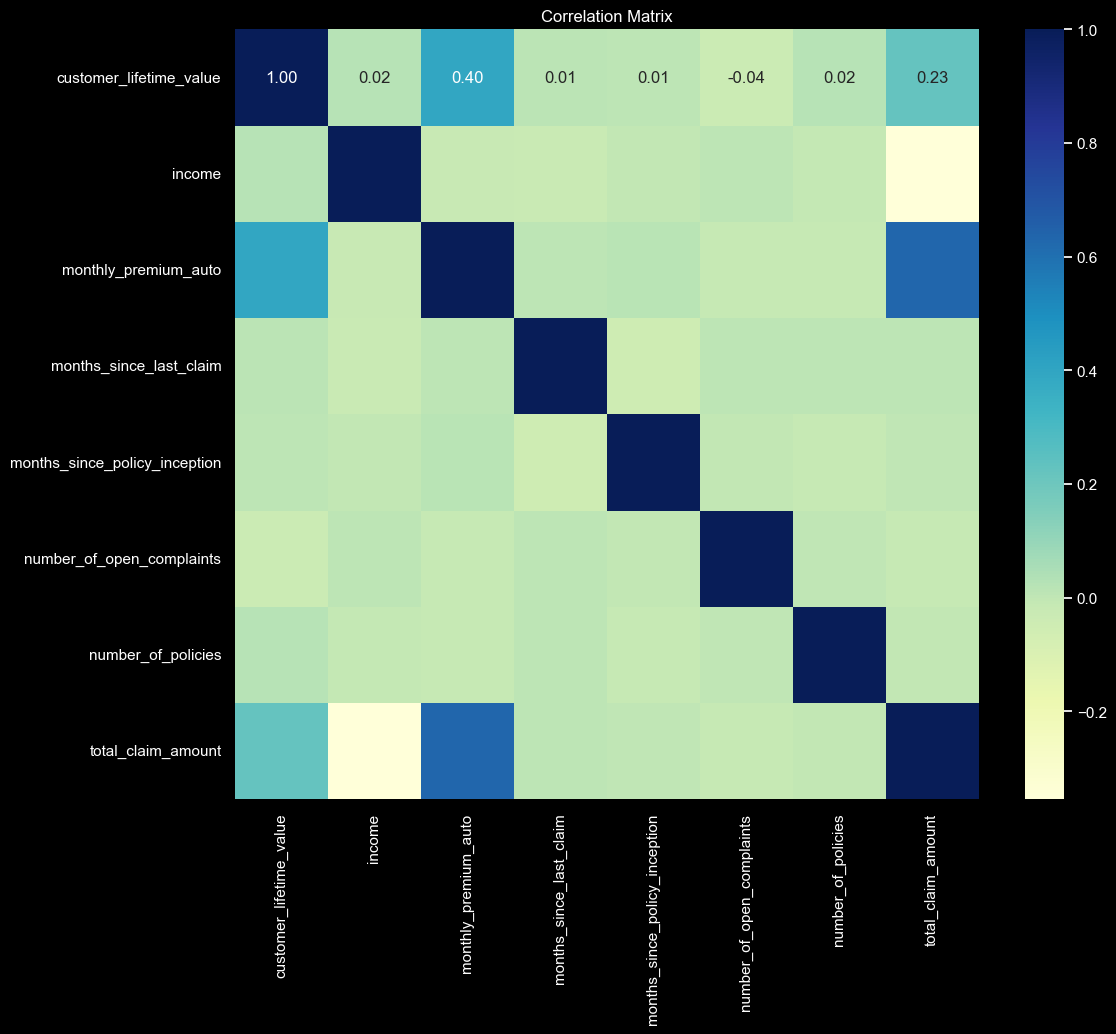

In [8]:
sns.set(style="darkgrid")
plt.style.use("dark_background")

correlation_matrix  = customer_df.corr(numeric_only=True)

## Correlation matrix plot
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix , annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


## Total Claim Amount & Monthly Premium Auto: strong positive correlation (0.63)
## Customer Lifetime Value & Monthly Premium Auto:  moderate positive correlation (0.40)
## Months Since Policy Inception & Months Since Last Claim: very low positive correlation (0.005)

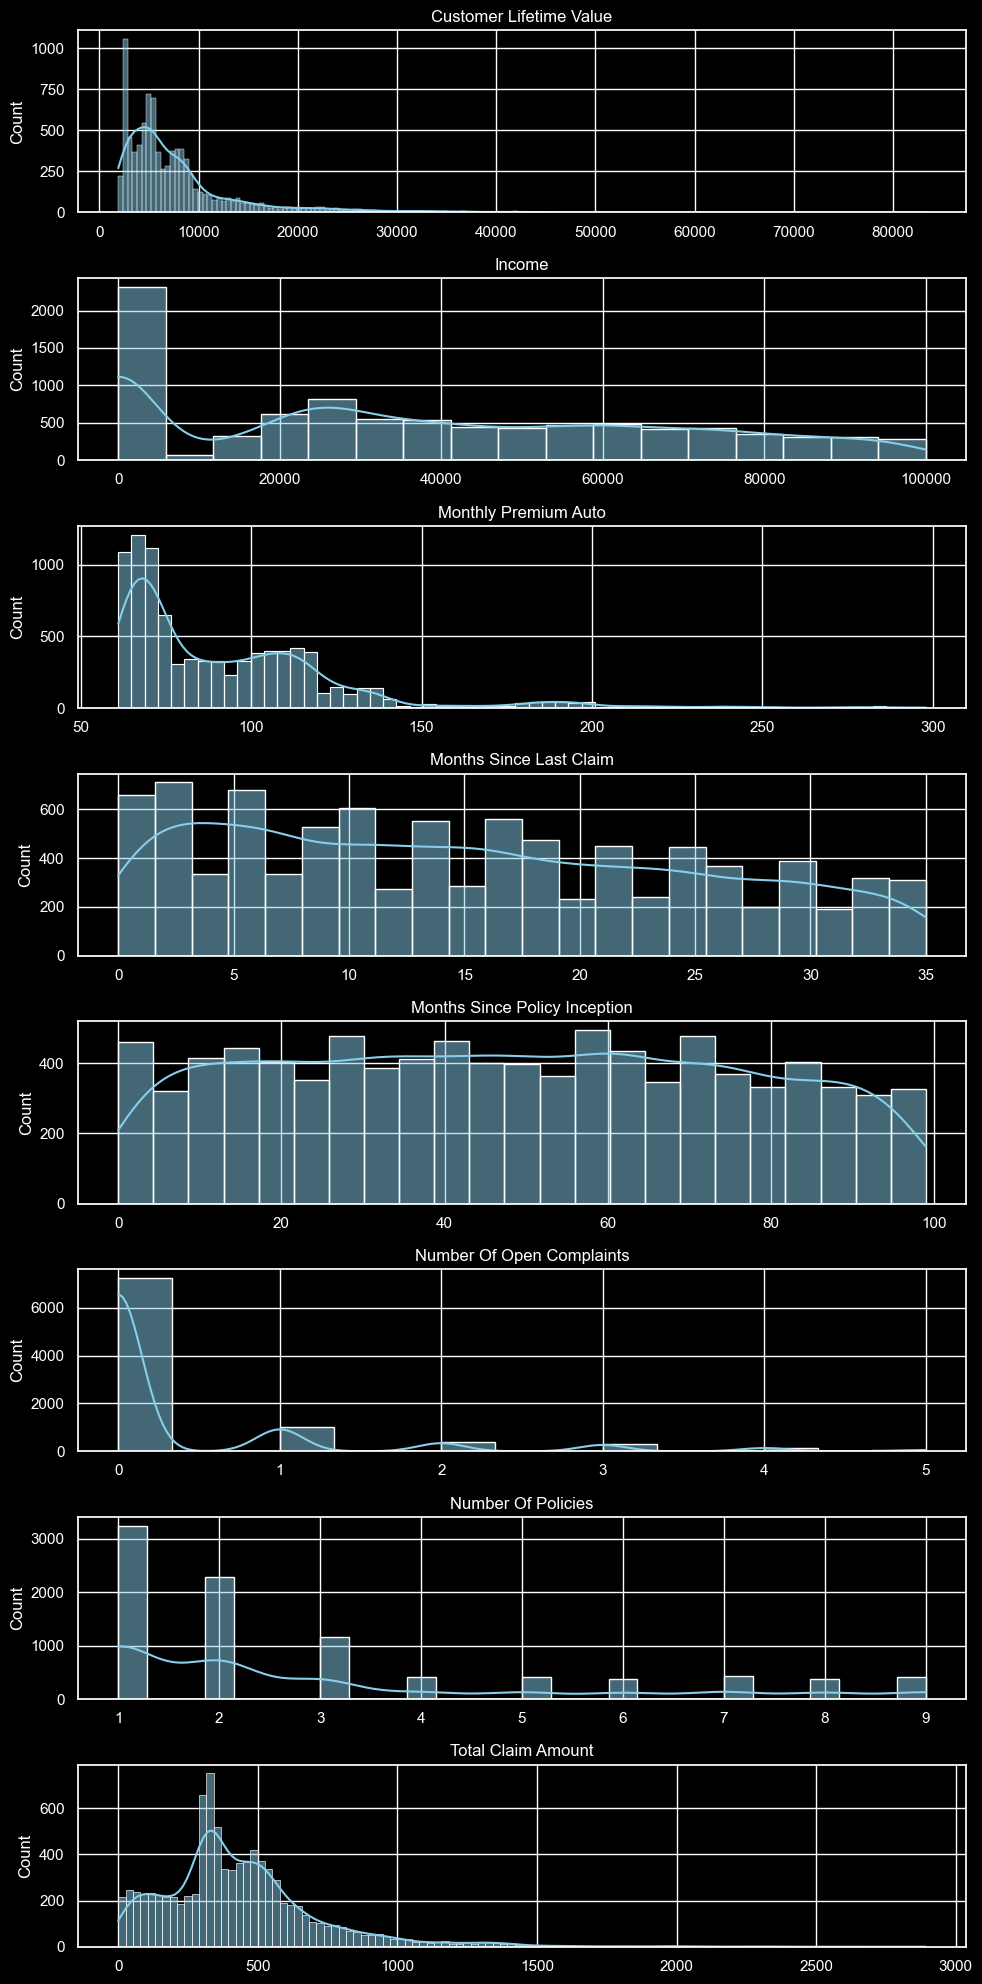

In [9]:
continuous_vars = customer_df.select_dtypes(include=['float64', 'int64']).columns

# Plotting each continuous variable using histograms
fig, axes = plt.subplots(nrows=len(continuous_vars), ncols=1, figsize=(10, 20))

for i, var in enumerate(continuous_vars):
    sns.histplot(customer_df[var], ax=axes[i], kde=True, color="skyblue")
    axes[i].set_title(var.replace('_', ' ').title())
    axes[i].set_xlabel('')

plt.tight_layout()
plt.show()

Customer Lifetime Value: The distribution is right-skewed, meaning most customers have lower lifetime values, with a few outliers having very high values. This suggests that while the majority of customers are at the lower end of the value spectrum, there are some highly valuable customers.

Income: The distribution is bimodal, showing a significant peak at the lower end, likely representing unemployed or low-income customers, and another broader peak at higher income levels. This indicates a diverse customer base in terms of economic status.

Monthly Premium Auto: The distribution is right-skewed, similar to customer lifetime value, indicating that most customers pay lower premiums, with fewer customers opting for or requiring more expensive coverage.

Months Since Last Claim and Months Since Policy Inception: These distributions are more uniform, suggesting that claims and policy durations are evenly spread over time without significant clustering at specific periods.

Number of Open Complaints: The distribution is heavily skewed towards zero, indicating that most customers have few to no complaints. This could suggest overall satisfaction or a non-confrontational customer base.

Number of Policies: The distribution shows a declining trend as the number of policies increases, indicating that most customers hold fewer policies, with a diminishing number holding multiple policies.

Total Claim Amount: The distribution is right-skewed, similar to the premium and lifetime value distributions, showing many small claims and fewer large claims. This pattern is typical of general insurance claim distributions.

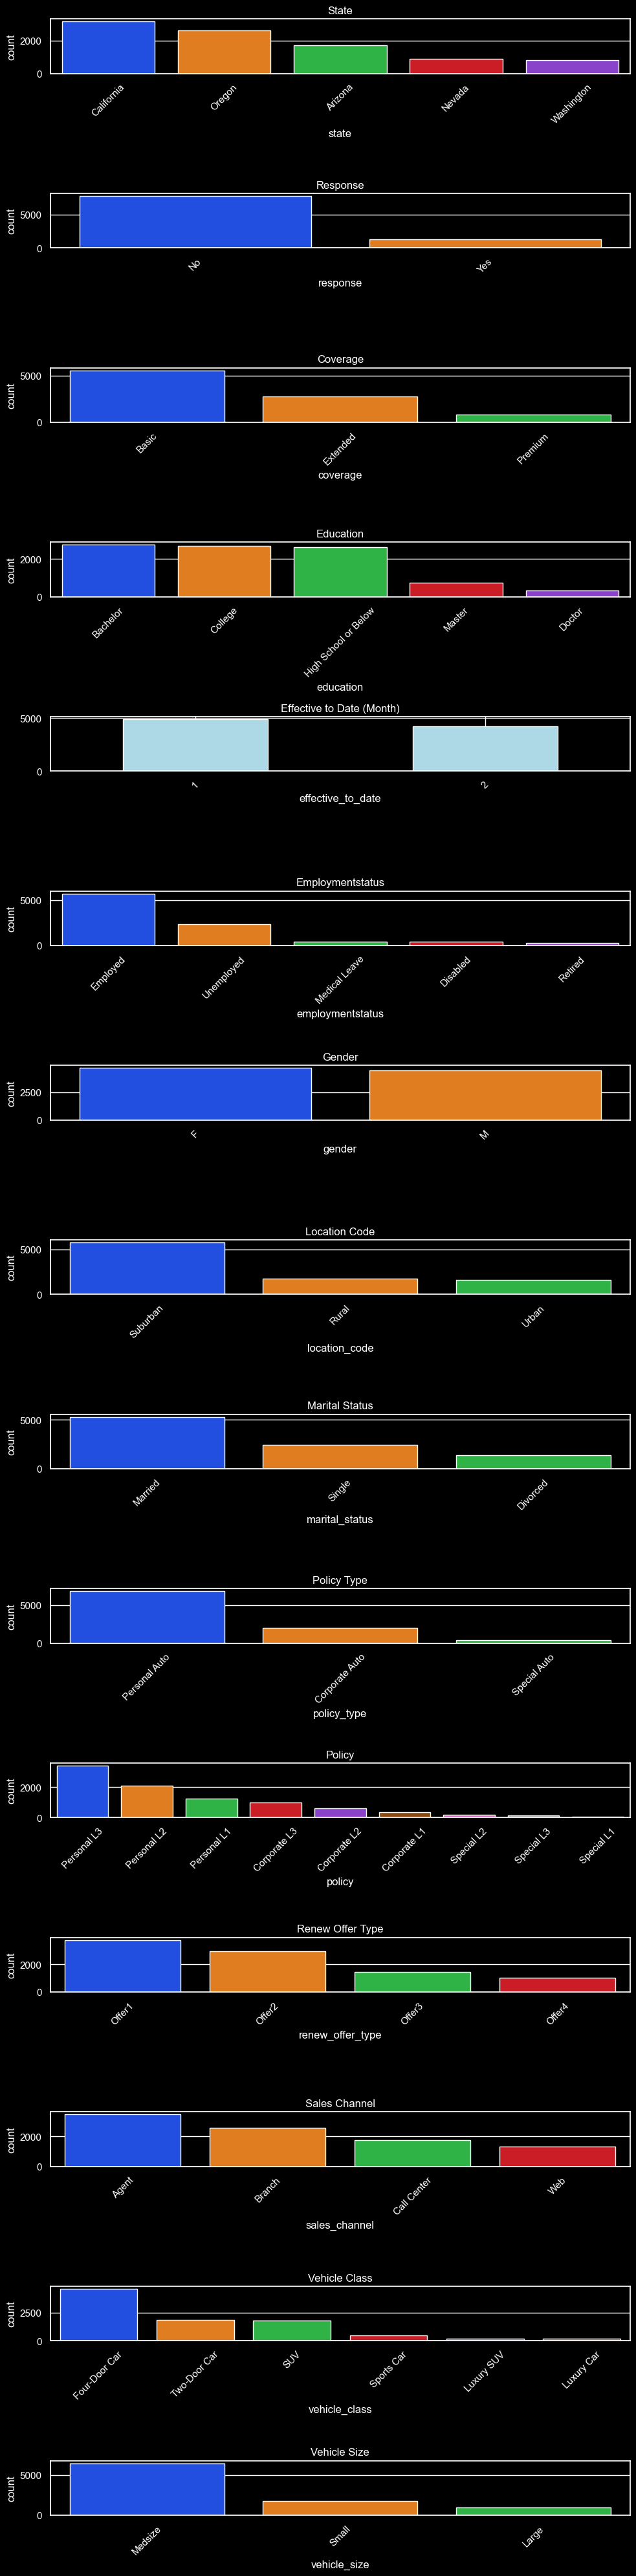

In [10]:
customer_df = customer_df.drop('customer', axis=1)

# Identifying categorical variables for plotting
categorical_vars = customer_df.select_dtypes(include=['object', 'datetime64[ns]']).columns

# Setting up plots for categorical variables using bar plots
fig, axes = plt.subplots(nrows=len(categorical_vars), ncols=1, figsize=(10, 40))

for i, var in enumerate(categorical_vars):
    if var == 'effective_to_date':
        # For the date, we plot the count of entries per month to keep it categorical in nature
        customer_df[var].dt.month.value_counts().sort_index().plot(kind='bar', ax=axes[i], color='lightblue')
        axes[i].set_title('Effective to Date (Month)')
    else:
        order = customer_df[var].value_counts().index
        sns.countplot(data=customer_df, x=var, ax=axes[i], order=order, palette='bright')
        axes[i].set_title(var.replace('_', ' ').title())
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

State: California has the highest number of customers, indicating a stronger market presence or a preference for this insurance company in that state.

Response: A significant majority of customers did not respond to marketing efforts, suggesting a need to re-evaluate the approach to increase engagement.

Coverage: Basic coverage is the most common, followed by extended and premium, reflecting a customer preference for cost-effective insurance options.

Education: The distribution across education levels is relatively balanced, with Bachelor's degrees being slightly more prevalent. This suggests a well-distributed customer base across different educational backgrounds.

Employment Status: Employed individuals constitute the majority of the customer base, likely correlating with the ability to afford insurance. The presence of unemployed and other categories indicates diversity in customer employment status.

Gender: The distribution between male and female customers is almost even, indicating no significant gender bias in policy ownership.

Location Code: Suburban locations have the highest number of customers, possibly due to demographic distributions or preferences in those areas.

Marital Status: Married individuals are the largest group, potentially indicating a tendency for married couples to secure insurance.

Policy Type and Policy: Personal Auto is the most common policy type, with Personal L3 being the most common specific policy. This shows a preference or need for personal vehicle insurance among the customers.

Renew Offer Type: Offer1 appears to be the most accepted or selected offer, suggesting it might be the most attractive in terms of benefits or costs.

Sales Channel: The agent channel is the most popular for sales, highlighting the importance of personal interaction in insurance sales.

Vehicle Class: Four-Door Cars are the most insured vehicle class, likely due to their commonality. Luxury vehicles have the fewest insurances, possibly reflecting their lower population or higher insurance costs.

Vehicle Size: Medium-sized vehicles are the most common among the insured, suggesting a preference or prevalence of this size in the customer vehicle portfolio.

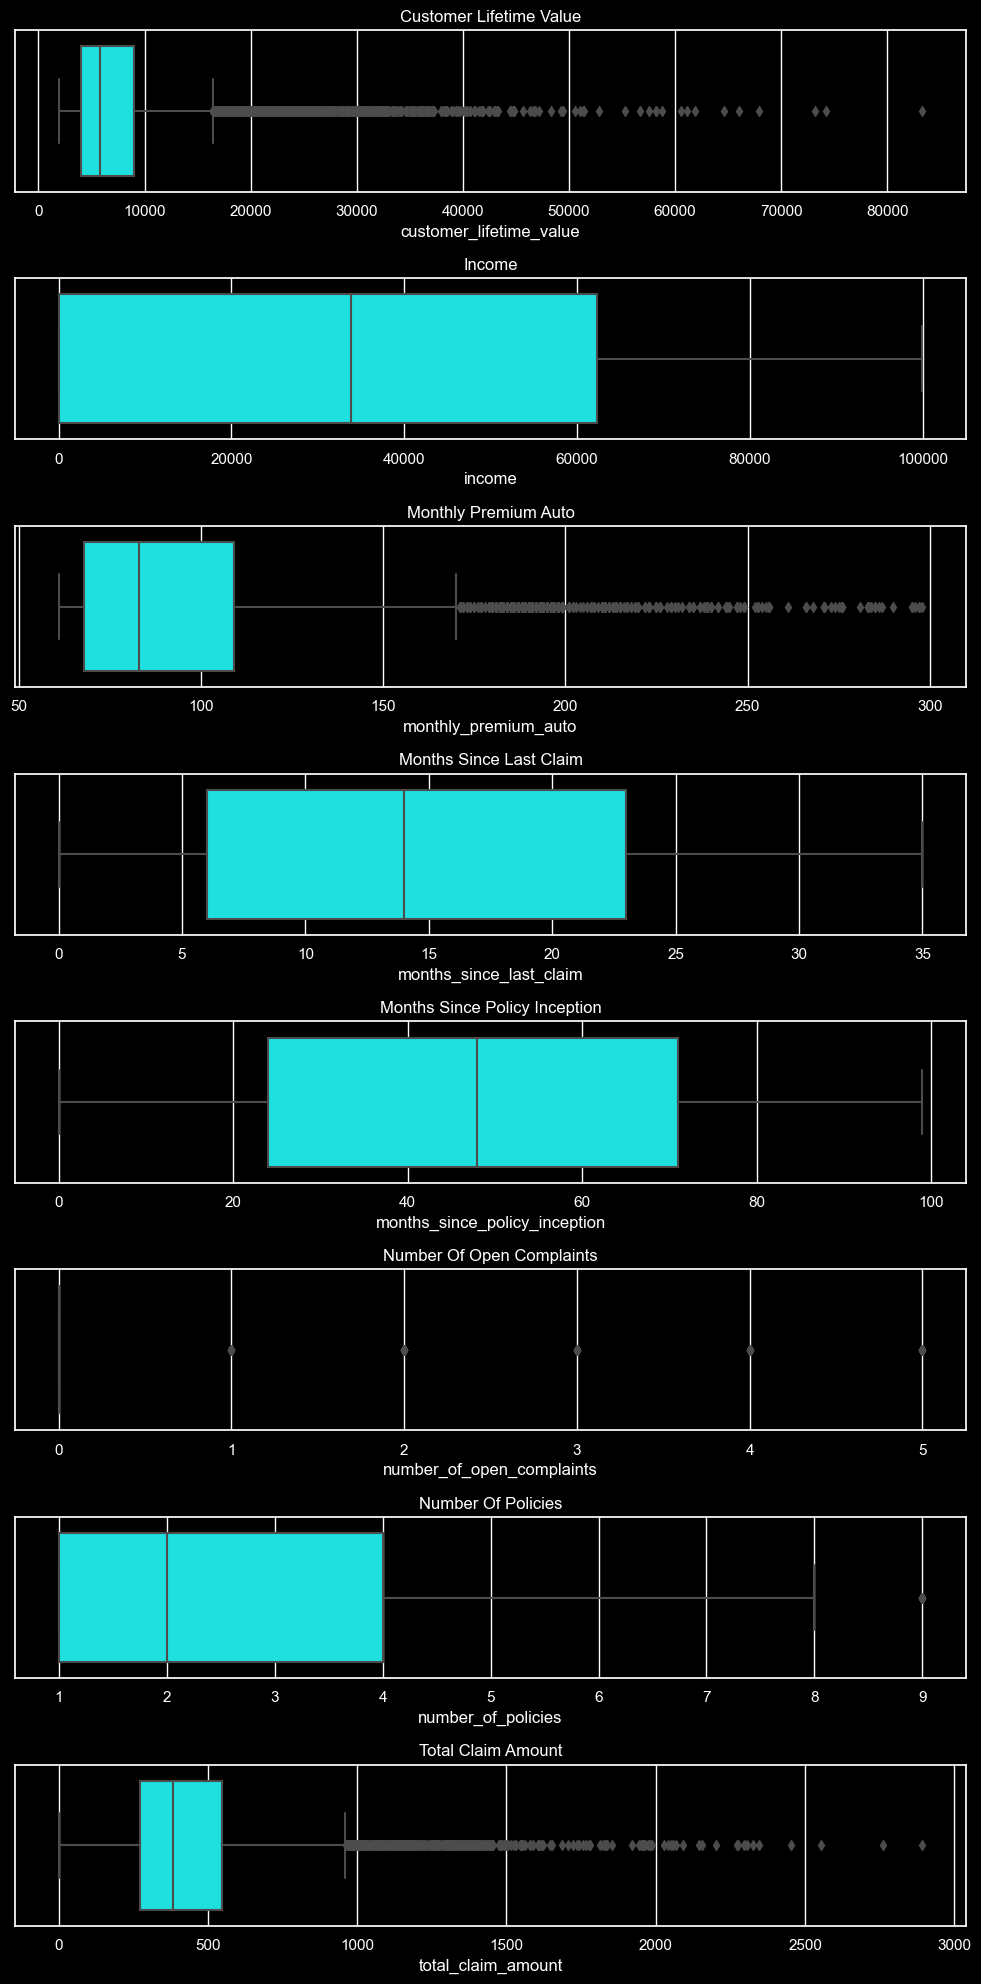

In [11]:
continuous_vars = customer_df.select_dtypes(include=['int64', 'float64']).columns

# Plotting boxplots for continuous variables to identify outliers
fig, axes = plt.subplots(nrows=len(continuous_vars), ncols=1, figsize=(10, 20))

for i, var in enumerate(continuous_vars):
    sns.boxplot(x=customer_df[var], ax=axes[i], color="cyan")
    axes[i].set_title(var.replace('_', ' ').title())

plt.tight_layout()
plt.show()

Analytical Approach: Outliers in customer lifetime value, monthly premium auto, and total claim amount should be investigated further. These outliers could signify high-value customers or specific segments that may need tailored services. Ignoring these outliers without analysis might result in losing valuable insights.

Data Cleaning: For predictive modeling purposes, handling outliers through transformation, capping, or removal can improve model accuracy and generalization.

Business Strategy: Understanding the causes of these outliers (e.g., luxury vehicle insurance resulting in high premiums and claim amounts) can help develop targeted strategies for product offerings and customer engagement.

In [12]:
nan_values = customer_df.isna().sum()

# Deciding what to do with NaN values based on the summary
nan_values_decision = "No action needed" if nan_values.sum() == 0 else "Further investigation required"

nan_values, nan_values_decision

(state                            0
 customer_lifetime_value          0
 response                         0
 coverage                         0
 education                        0
 effective_to_date                0
 employmentstatus                 0
 gender                           0
 income                           0
 location_code                    0
 marital_status                   0
 monthly_premium_auto             0
 months_since_last_claim          0
 months_since_policy_inception    0
 number_of_open_complaints        0
 number_of_policies               0
 policy_type                      0
 policy                           0
 renew_offer_type                 0
 sales_channel                    0
 total_claim_amount               0
 vehicle_class                    0
 vehicle_size                     0
 dtype: int64,
 'No action needed')

No need to do anything more